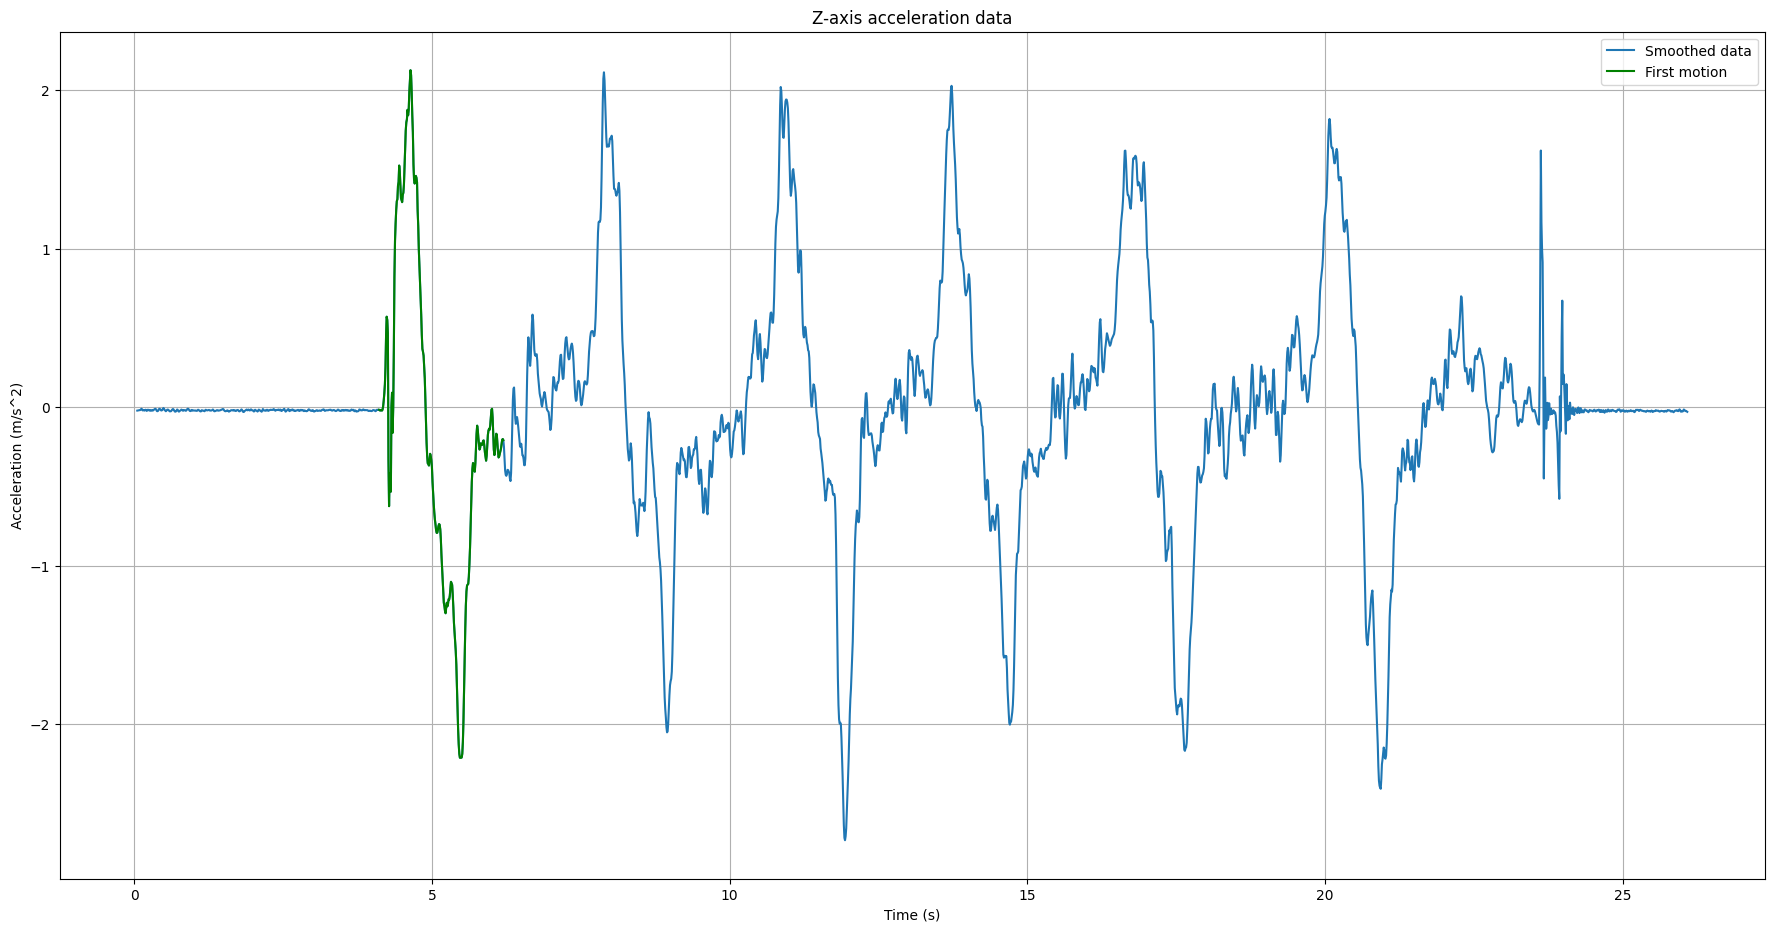

In [2]:
import matplotlib.pyplot as plt
import time
import pandas

# Load the data
df = pandas.read_csv('data/Acceleration without g 2024-01-17 08-35-37/Raw Data.csv')

# Plot the raw z-axis acceleration data
plt.figure(figsize=(22, 11))

# Apply a smoothing filter to the z-axis acceleration data
df['Smoothed Acceleration z (m/s^2)'] = df['Linear Acceleration z (m/s^2)'].rolling(window=5).mean()

# Plot the smoothed data
plt.plot(df['Time (s)'], df['Smoothed Acceleration z (m/s^2)'], label='Smoothed data')

first_motion = df[(df['Time (s)'] >= 4.1) & (df['Time (s)'] <= 6.2)]
plt.plot(first_motion['Time (s)'], first_motion['Smoothed Acceleration z (m/s^2)'], label='First motion', color='green')

plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Z-axis acceleration data')
plt.legend()
plt.grid()

### Getting energy

Energy is (J):  23.29732525603875


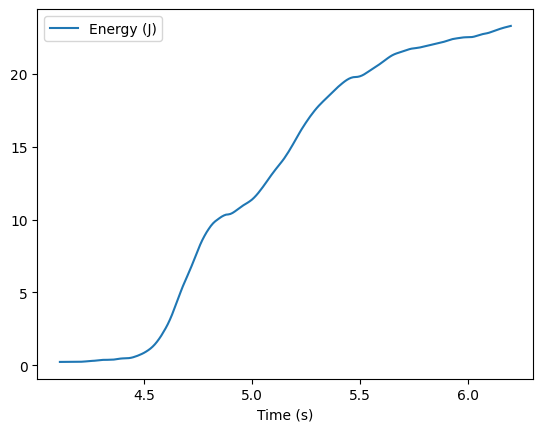

In [3]:
def get_velocity(acceleration: float, V0: float, delta_t: float):
  # a = (V1-V0) / t
  # V1 = a*t + V0
  return acceleration * delta_t + V0

def get_distance(delta_V: float, delta_t: float):
  # V = s/t
  # s = V*t
  return delta_V * delta_t

def get_energy_spent(mass: float, distance: float, acceleration: float):
  # A = F*s
  # F = m*a
  return mass * acceleration * distance

mass = 50
previous_time = 0.0
previous_velocity = 0.0
total_distance = 0.0
total_energy = 0.0
velocity_vec = [[]]
distance_vec = [[]]
energy_vec = [[]]

start_time = time.time()
for index, row in first_motion.iterrows():
  timestep = row["Time (s)"] - previous_time

  velocity = get_velocity(row["Smoothed Acceleration z (m/s^2)"], previous_velocity, timestep)
  velocity_vec.append([row["Time (s)"], velocity])

  distance_step = abs(get_distance(velocity, timestep))
  total_distance += distance_step
  distance_vec.append([row["Time (s)"], total_distance])

  energy_step = abs(get_energy_spent(mass, distance_step, row["Smoothed Acceleration z (m/s^2)"]))
  total_energy += energy_step
  energy_vec.append([row["Time (s)"], total_energy])

  previous_velocity = velocity
  previous_time = row["Time (s)"]
df_energy = pandas.DataFrame(energy_vec, columns=["Time (s)", "Energy (J)"])
df_energy.plot.line(x="Time (s)", y="Energy (J)")
print("Energy is (J): ", total_energy)

### Energy, integrating

In [4]:
import numpy as np

def get_velocity(acceleration: np.array, delta_t: float):
    # Integrate acceleration over time to get velocity
    return np.cumsum(acceleration) * delta_t

def get_distance(velocity: np.array, delta_t: float):
    # Integrate velocity over time to get distance
    return np.cumsum(velocity) * delta_t

def get_energy_spent(mass: float, distance: np.array, acceleration: np.array):
    # Calculate force
    force = mass * acceleration[:-1]
    # Integrate force over distance to get energy
    return np.abs(force * np.diff(distance)).sum()

# Convert acceleration to numpy array
acceleration = first_motion["Smoothed Acceleration z (m/s^2)"].to_numpy()
delta_t = np.diff(first_motion["Time (s)"]).mean()

# Calculate velocity, distance, and energy
velocity = get_velocity(acceleration, delta_t)
distance = get_distance(velocity, delta_t)

total_energy = get_energy_spent(mass, distance, acceleration)

print("Energy is (J): ", total_energy)

Energy is (J):  26.23523091339863
